In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [3]:
population_model = "PBH-bpower-1st"
cosmology_model = 'flatLCDM'
outdir = f'./results/H0_GWTC-3_{population_model}_{cosmology_model}_final2/'
injections.update_cut(snr_cut=9, ifar_cut=0) 

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict['ms'] = Uniform(5.0, 50.0, name='$m_*$')
prior_dict['α1'] = Uniform(0, 3.0, name='$\\alpha_1$')
prior_dict['α2'] = Uniform(1.0, 10.0, name='$\\alpha_2$')
# prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict


{'ms': Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

23:18 bilby INFO    : Running for label 'dynesty', output will be saved to './results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2/'
23:18 bilby INFO    : Search parameters:
23:18 bilby INFO    :   ms = Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
23:18 bilby INFO    :   α1 = Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
23:18 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
23:18 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
23:18 bilby INFO    :   H0 = 67.4
23:18 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


23:18 bilby INFO    : Single likelihood evaluation took 1.792e-01 s


0it [00:00, ?it/s]

23:18 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f18600c8910>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
23:18 bilby INFO    : Checkpoint every check_point_delta_t = 60s
23:18 bilby INFO    : Using dynesty version 1.0.1
23:18 bilby INFO    : Using the bilby-implemented rwalk sampl

1171it [04:01,  5.21it/s, bound:0 nc: 37 ncall:5.5e+03 eff:21.1% logz=-1845.72+/-0.15 dlogz:91.675>0.1]    

23:22 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1470it [05:03,  2.54it/s, bound:0 nc:  2 ncall:1.1e+04 eff:13.9% logz=-1817.70+/-0.15 dlogz:63.053>0.1]

23:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1649it [06:05,  2.04it/s, bound:0 nc: 51 ncall:1.6e+04 eff:10.5% logz=-1806.27+/-0.15 dlogz:51.248>0.1]

23:24 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1797it [07:12,  2.70it/s, bound:13 nc: 38 ncall:2.1e+04 eff:8.6% logz=-1798.47+/-0.15 dlogz:43.134>0.1]

23:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1978it [08:13,  2.93it/s, bound:31 nc: 32 ncall:2.6e+04 eff:7.5% logz=-1791.54+/-0.15 dlogz:35.823>0.1]

23:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2185it [09:24,  2.93it/s, bound:51 nc: 39 ncall:3.3e+04 eff:6.6% logz=-1785.08+/-0.15 dlogz:28.942>0.1]

23:27 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2361it [10:25,  2.82it/s, bound:69 nc: 29 ncall:3.9e+04 eff:6.1% logz=-1780.68+/-0.16 dlogz:24.185>0.1]

23:28 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2517it [11:27,  2.52it/s, bound:87 nc: 31 ncall:4.4e+04 eff:5.7% logz=-1777.85+/-0.16 dlogz:21.878>0.1]

23:29 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2674it [12:29,  2.52it/s, bound:105 nc: 36 ncall:5.0e+04 eff:5.4% logz=-1775.07+/-0.16 dlogz:18.786>0.1]

23:30 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2851it [13:43,  2.47it/s, bound:126 nc: 39 ncall:5.7e+04 eff:5.0% logz=-1772.54+/-0.16 dlogz:15.906>0.1]

23:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3017it [14:50,  2.52it/s, bound:145 nc: 56 ncall:6.3e+04 eff:4.8% logz=-1770.37+/-0.16 dlogz:13.761>0.1]

23:33 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3193it [15:57,  2.49it/s, bound:166 nc: 28 ncall:6.9e+04 eff:4.6% logz=-1768.61+/-0.17 dlogz:11.652>0.1]

23:34 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3334it [17:05,  2.21it/s, bound:184 nc: 32 ncall:7.5e+04 eff:4.4% logz=-1767.36+/-0.17 dlogz:10.113>0.1]

23:35 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3490it [18:13,  2.32it/s, bound:205 nc: 31 ncall:8.2e+04 eff:4.3% logz=-1766.24+/-0.17 dlogz:8.856>0.1] 

23:36 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3657it [19:24,  2.46it/s, bound:225 nc: 23 ncall:8.8e+04 eff:4.1% logz=-1765.31+/-0.17 dlogz:7.592>0.1]

23:37 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3828it [20:33,  2.36it/s, bound:245 nc:138 ncall:9.5e+04 eff:4.0% logz=-1764.50+/-0.17 dlogz:6.434>0.1]

23:38 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3996it [21:44,  2.33it/s, bound:266 nc: 34 ncall:1.0e+05 eff:3.9% logz=-1763.86+/-0.17 dlogz:5.458>0.1]

23:40 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4156it [22:54,  2.19it/s, bound:285 nc:103 ncall:1.1e+05 eff:3.8% logz=-1763.33+/-0.17 dlogz:4.618>0.1]

23:41 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4319it [24:04,  2.30it/s, bound:307 nc: 76 ncall:1.2e+05 eff:3.8% logz=-1762.86+/-0.17 dlogz:4.096>0.1]

23:42 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4472it [25:14,  2.25it/s, bound:327 nc: 75 ncall:1.2e+05 eff:3.7% logz=-1762.48+/-0.18 dlogz:3.432>0.1]

23:43 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4622it [26:26,  2.19it/s, bound:347 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1762.17+/-0.18 dlogz:2.854>0.1]

23:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:44 bilby INFO    : Writing 118 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4757it [27:28,  2.25it/s, bound:365 nc: 34 ncall:1.3e+05 eff:3.6% logz=-1761.94+/-0.18 dlogz:2.391>0.1]

23:45 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:45 bilby INFO    : Writing 176 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4929it [28:40,  2.40it/s, bound:386 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1761.69+/-0.18 dlogz:1.977>0.1]

23:47 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:47 bilby INFO    : Writing 228 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5103it [29:53,  2.46it/s, bound:409 nc: 80 ncall:1.5e+05 eff:3.5% logz=-1761.49+/-0.18 dlogz:1.523>0.1]

23:48 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:48 bilby INFO    : Writing 326 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5276it [31:06,  2.44it/s, bound:431 nc: 39 ncall:1.5e+05 eff:3.4% logz=-1761.33+/-0.18 dlogz:1.150>0.1]

23:49 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:49 bilby INFO    : Writing 425 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5423it [32:10,  2.29it/s, bound:450 nc: 80 ncall:1.6e+05 eff:3.4% logz=-1761.21+/-0.18 dlogz:0.891>0.1]

23:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:50 bilby INFO    : Writing 566 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5570it [33:14,  2.31it/s, bound:470 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.12+/-0.18 dlogz:0.682>0.1]

23:51 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:51 bilby INFO    : Writing 729 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5707it [34:17,  2.30it/s, bound:488 nc: 39 ncall:1.7e+05 eff:3.3% logz=-1761.05+/-0.18 dlogz:0.526>0.1]

23:52 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:52 bilby INFO    : Writing 1004 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5853it [35:19,  2.35it/s, bound:507 nc: 73 ncall:1.8e+05 eff:3.3% logz=-1760.99+/-0.18 dlogz:0.434>0.1]

23:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:53 bilby INFO    : Writing 1301 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6002it [36:22,  2.38it/s, bound:526 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1760.94+/-0.18 dlogz:0.325>0.1]

23:54 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:54 bilby INFO    : Writing 1678 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6144it [37:25,  2.32it/s, bound:546 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1760.90+/-0.18 dlogz:0.245>0.1]

23:55 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:55 bilby INFO    : Writing 1930 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6292it [38:28,  2.38it/s, bound:565 nc: 40 ncall:2.0e+05 eff:3.2% logz=-1760.87+/-0.18 dlogz:0.183>0.1]

23:56 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:56 bilby INFO    : Writing 1928 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6438it [39:32,  2.29it/s, bound:584 nc: 80 ncall:2.0e+05 eff:3.2% logz=-1760.84+/-0.18 dlogz:0.137>0.1]

23:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:57 bilby INFO    : Writing 1936 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6586it [40:35,  2.37it/s, bound:604 nc: 40 ncall:2.1e+05 eff:3.1% logz=-1760.82+/-0.18 dlogz:0.102>0.1]

23:59 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:59 bilby INFO    : Writing 1888 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6595it [40:38,  2.46it/s, bound:605 nc:  1 ncall:2.1e+05 eff:3.1% logz=-1760.82+/-0.18 dlogz:0.100>0.1]

23:59 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_resume.pickle
23:59 bilby INFO    : Writing 1960 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
23:59 bilby INFO    : Starting to close worker pool.
23:59 bilby INFO    : Finished closing worker pool.


6595it [40:41,  2.70it/s, bound:605 nc:  1 ncall:2.1e+05 eff:3.4% logz=-1760.75+/-0.19 dlogz:0.000>0.1]



23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
23:59 bilby WARNING : Multiple likelihood matches found between 

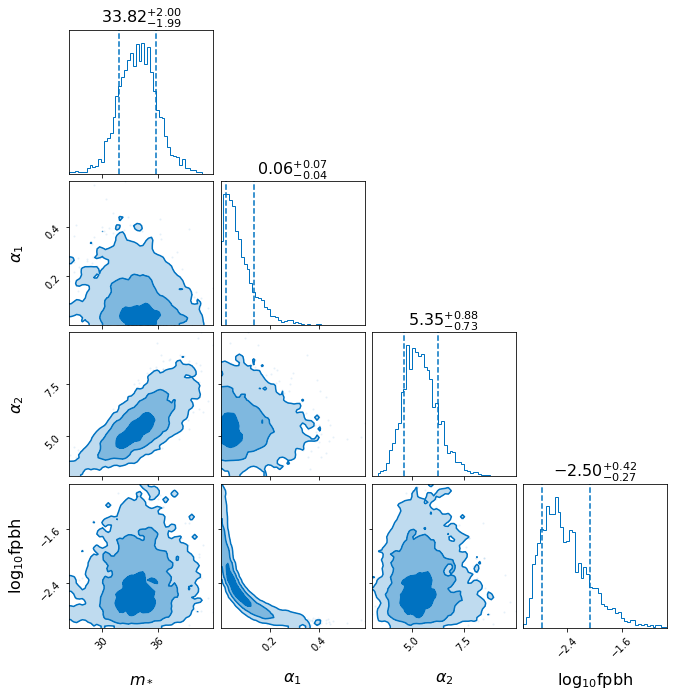

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [14]:
10**(-2.5), 10**(-2.5+0.42) - 10**(-2.5), 10**(-2.5)-10**(-2.5-0.27)

(0.0031622776601683794, 0.005155360050858329, 0.0014640340077066352)

In [7]:
import matplotlib.lines as mlines

outdir1 = "./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final/"
outdir2 = "./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final2/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

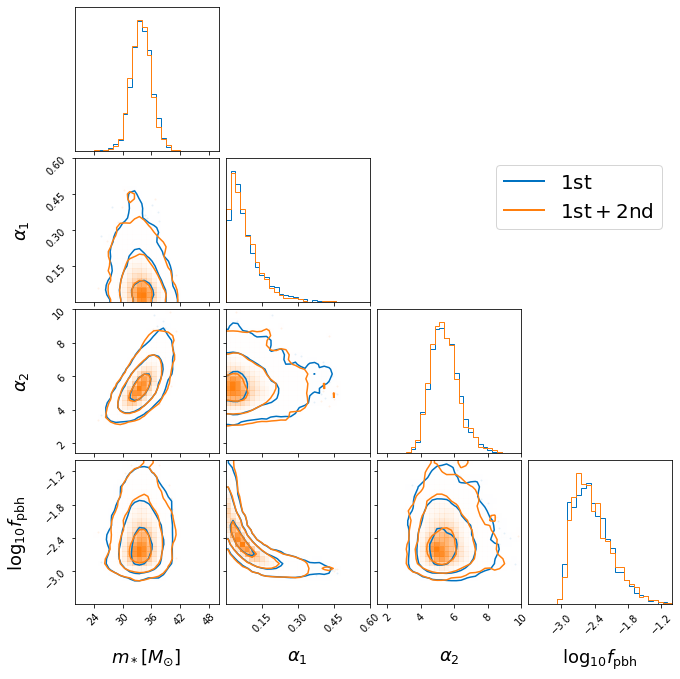

In [16]:
range=((20, 50), (0, 0.6), (1.4, 10), (-3.6, -1))

fig = corner.corner(
    posteriors1,
    bins=30,
    smooth=0.9,
    color="#0072C1",
    labels=[
        r"$m_*[M_{\odot}]$",
        r"$\alpha_1$",
        r"$\alpha_2$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=range,
)

corner.corner(
    posteriors2,
    bins=30,
    smooth=0.9,
    color="#FF7F0E",
    labels=[
        r"$m_*[M_{\odot}]$",
        r"$\alpha_1$",
        r"$\alpha_2$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=range,
    fig=fig,
    weights=np.ones(len(posteriors2)) * len(posteriors1) / len(posteriors2),
)

blue_line = mlines.Line2D([], [], color="#0072C1", lw=2, label=r"$\rm{1st}$")
orange_line = mlines.Line2D([], [], color="#FF7F0E", lw=2, label=r"$\rm{1st+2nd}$")
plt.legend(
    handles=[blue_line, orange_line],
    bbox_to_anchor=(1, 3.12),
    loc="upper right",
    fontsize=20,
)  # prop={'size': 8})
plt.savefig("../latex/post-bpower.pdf")
plt.show()
